### Fatalities caused by Tornados in the United States documented from 1950 - 2020
##### <em>Analyzation of Fatalities Given Other Parameters</em>

###### By: <em><strong>Rishi Patel (100920317)</strong></em>

##### Intrdoduction:

This analysis centers on a tornado dataset derived from information produced by NOAA’s Storm Prediction Center. NOAA (the National Oceanic and Atmospheric Administration) is one of the most respected sources for environmental and meteorological data in the United States. This dataset has been streamlined to focus on essential factors associated with tornado activity, including their frequency, location, intensity, and impact. Tornado data like this is crucial for understanding patterns in tornado behavior, helping to improve preparedness and response strategies, and assessing the effects of tornados over time and across regions.

The dataset includes columns representing the date, location, magnitude, injuries, fatalities, and physical attributes of each tornado (such as latitude, longitude, length, and width). This information provides a comprehensive overview of tornados from their point of origin to the end of their paths, along with metrics on the physical impact they caused. One unique feature of this dataset is that it spans several decades, covering both the period when tornados were rated using the F-scale (prior to 2007) and the period when the Enhanced Fujita (EF) scale was implemented. This shift allows for an examination of tornados across a significant historical timeline while also presenting a unique opportunity to explore any impact of the new rating system.

Given this data, one particularly interesting question is to examine whether there are observable trends in tornado severity over time. Specifically, has the magnitude of tornados, as measured by the `mag` variable, changed over the years? By analyzing magnitude trends over different periods, we can assess whether tornados are becoming more or less intense on average, especially following the adoption of the EF scale in 2007.

Another key question involves exploring the geographic distribution of tornado occurrences and their associated impacts. Which states experience the highest number of tornados, and how does this frequency relate to the rates of injuries and fatalities in each state? By comparing tornado counts and severity outcomes across different regions, we can better understand where tornados cause the most damage and identify areas with higher risks of injury and fatality. This dataset’s extensive temporal and geographic range makes it a valuable resource for tracking tornado patterns and evaluating regional differences, which can inform both scientific research and public safety planning.

###### - generated introduction by ChatGPT, Prompt:

"Provide the reader with some background on your question and data. Where
did you get your data? What question looked interesting given the data you chose? This
section should be between 150-500 words. 

Given this info: “This dataset was derived from a dataset produced by NOAA's Storm Prediction Center. The primary changes made to create this dataset were the deletion of some columns, change of some data types, and sorting by date. Questions: 1. Are there any observable trends in the severity of tornados (measured by mag) over the years? (Magnitude v. Date), 2. Which states (st) experience the highest number of tornados, and how does this distribution compare to injury and fatality rates? (Tornado # v. State, Injury/Fatality rates v. State)"

![El Reno 2013, Largest tornado ever recorded](https://upload.wikimedia.org/wikipedia/commons/1/12/El_Reno%2C_OK_EF3_Tornado_2013-05-31.jpg)
###### *Image source: https://en.wikipedia.org/wiki/File:El_Reno,_OK_EF3_Tornado_2013-05-31.jpg*

##### <em>__________________________________________________________________________________________________________________________________________________ </em>

### Methods
##### <em>Data Collection</em>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
# Loading the downloaded csv into a DataBase
df = pd.read_csv("us_tornado_dataset_1950_2021.csv")

##### <em>___________________________________________________________________________________________________________________________________________________</em>


### Data sorted based on Question 1:

##### <em>"Are there any observable trends in the severity of tornados (measured by mag) over the years? (Magnitude v. Date)", use of a stacked bar graph was implemted to show how many of each magnitude tornado happened each year (changed from entire date since that is too broad) </em>

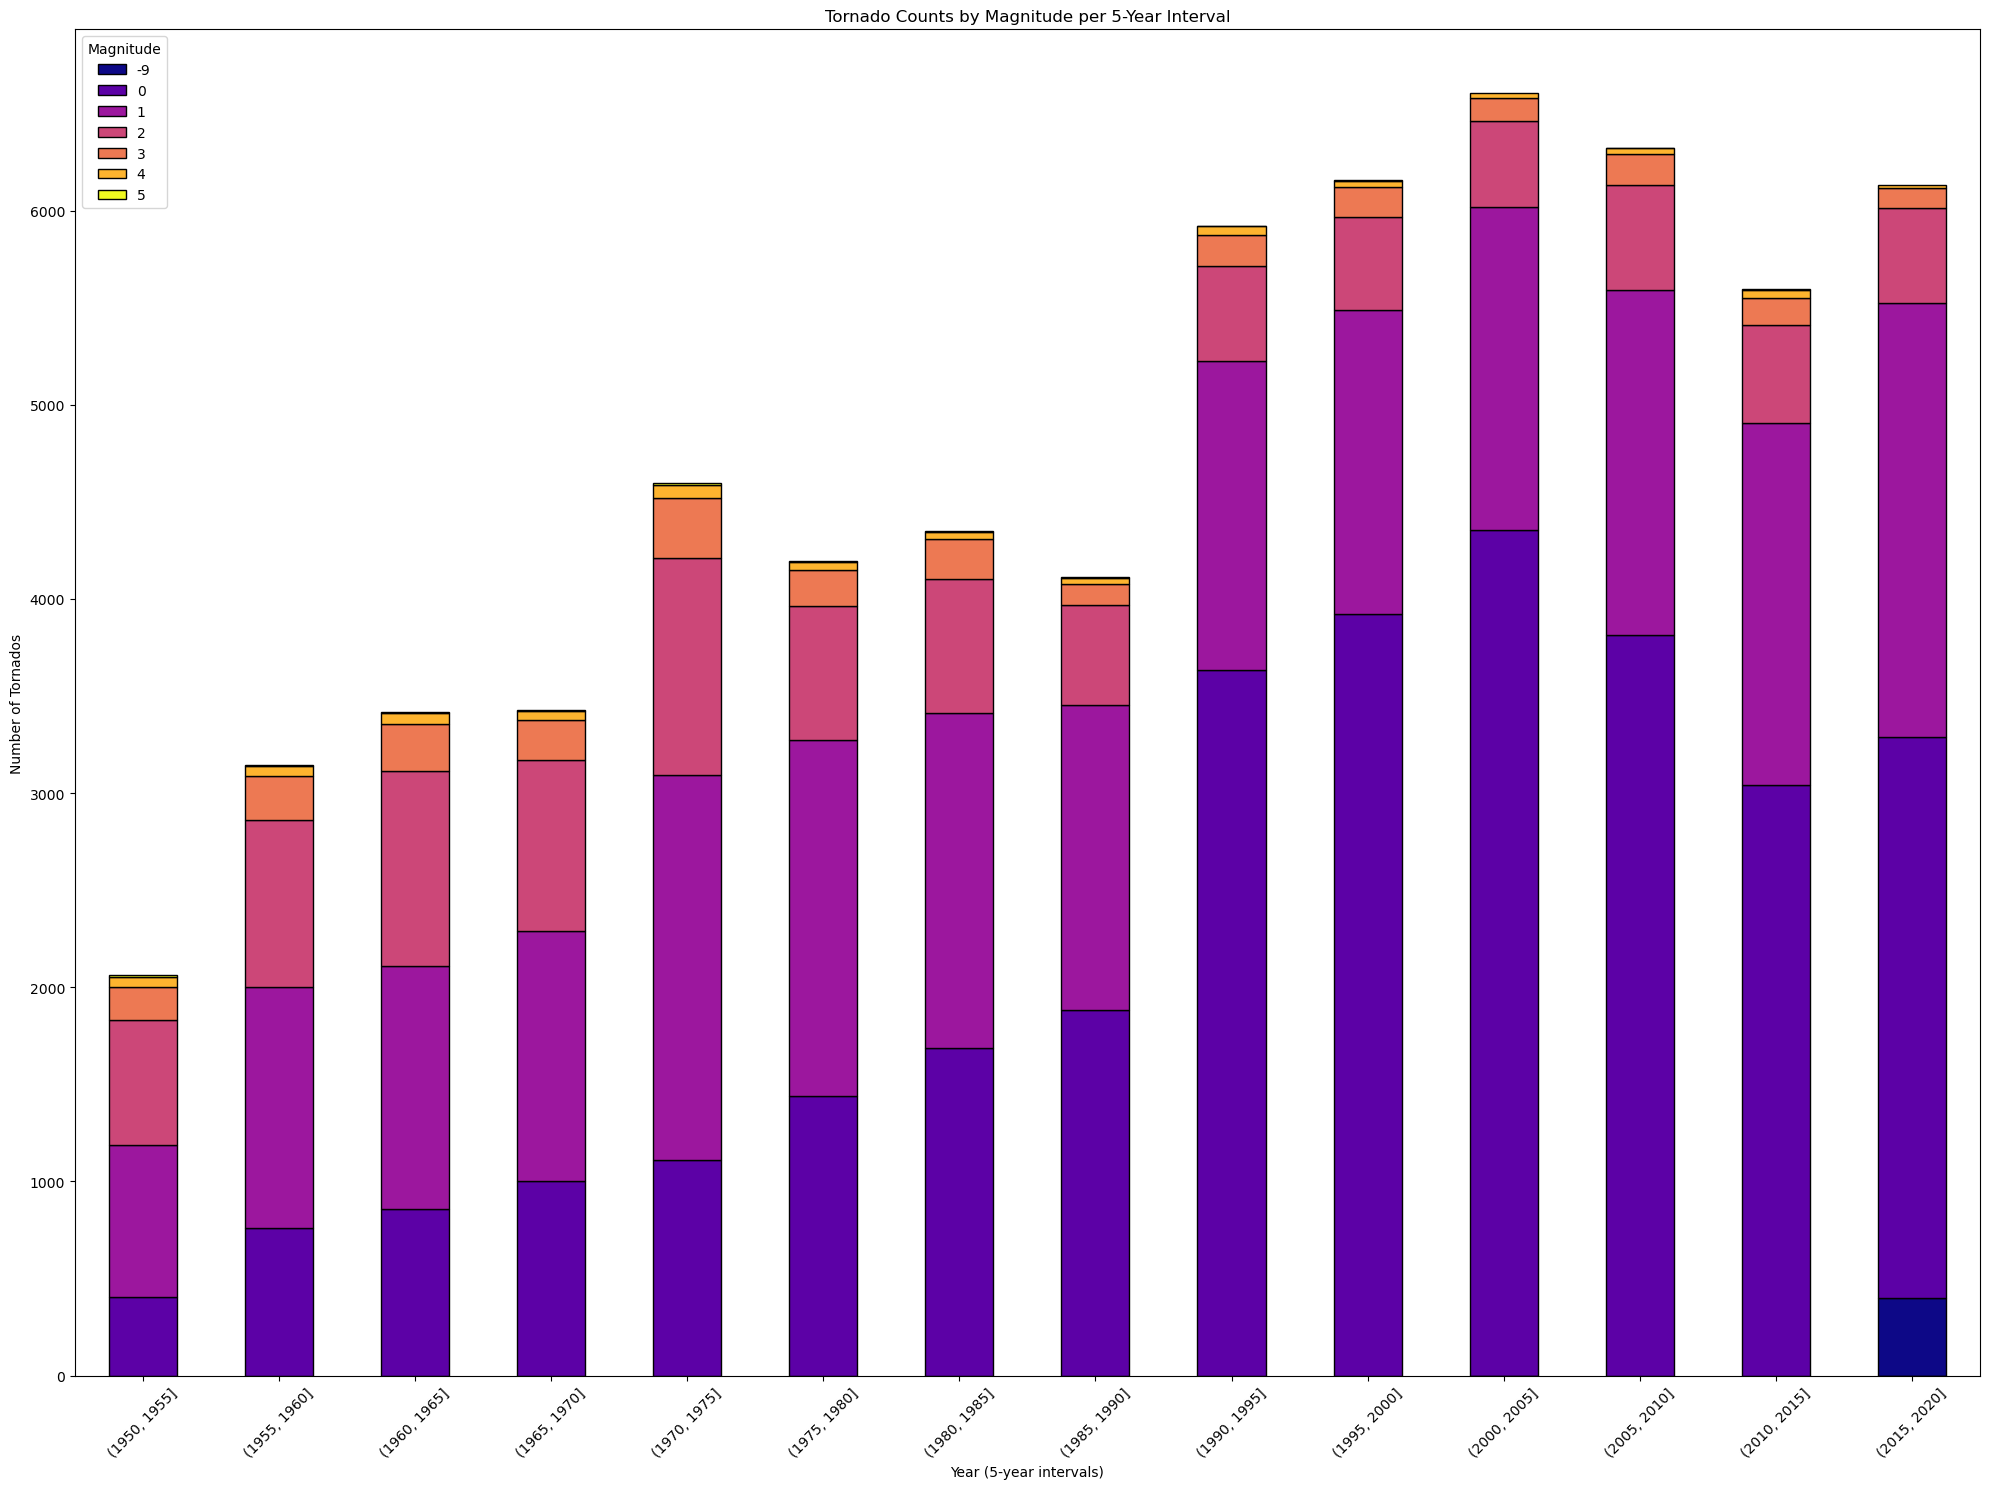

In [3]:
# Range of years in csv file from minimum to maximun incremented by +5 years
df["year_bin"] = pd.cut(df["yr"], bins=range(df["yr"].min(), df["yr"].max(), 5))

# Range of magnitudes in csv file from lowest to highest
yearly_magnitude_counts = df.groupby(["year_bin", "mag"]).size().unstack(fill_value=0)

# Creation of the graph
yearly_magnitude_counts.plot(kind="bar", stacked=True, edgecolor="black", colormap="plasma", figsize=(20, 15))

plt.xlabel("Year (5-year intervals)")
plt.ylabel("Number of Tornados")
plt.title("Tornado Counts by Magnitude per 5-Year Interval")
plt.xticks(rotation=45)
plt.legend(title="Magnitude",)
plt.tight_layout()
plt.show()

Upon inspection of the graph, "Tornado Counts by Magnitude per 5-Year Interval" its clear to see that as the years progressed (in 5 year increments) that the number of magnitude 0 tornados has steadily increased. Another observation is that magnitude 4 and above tornados are extremely rare compared to there weaker counterparts even after the introduction of the enhanced Fujita scale (EF Scale) in 2007

##### <em>A closer look at magnitude 5's since they make up such a small margin of the total number of tornados compared to other magnitude</em>

In [4]:
# Create 5-year bins for the data
df["year_bin"] = pd.cut(df["yr"], bins=range(df["yr"].min(), df["yr"].max(), 5))

# Group by year_bin and mag, and get counts for each combination of year_bin and category
category_counts = df.groupby(["year_bin", "mag"]).size().unstack(fill_value=0)

# Ensure the counts for all categories 0-5 are displayed, filling missing values with 0
category_counts = category_counts.reindex(columns=range(6), fill_value=0)

# Calculate the sum of tornadoes for each magnitude (0-5) across all years
category_totals = category_counts.sum(axis=0)

# Display the combined table as a formatted DataFrame
category_counts.style.set_caption("Tornado Counts by magnitude (per 5-Year Interval)").format(na_rep="0")


mag,0,1,2,3,4,5
year_bin,,,,,,
"(1950, 1955]",406,784,642,168,55,7
"(1955, 1960]",759,1244,858,227,52,6
"(1960, 1965]",858,1253,1004,242,58,3
"(1965, 1970]",1002,1288,881,207,44,8
"(1970, 1975]",1110,1982,1120,308,67,9
"(1975, 1980]",1441,1835,688,185,43,4
"(1980, 1985]",1688,1724,688,208,39,3
"(1985, 1990]",1883,1570,516,108,32,3
"(1990, 1995]",3635,1588,491,162,42,2


magnitude 5 tornados are orders of magnitude rarer than any other, while other categories like 0 or 1 come in batches of a around a thousand or more every 5 years, the magnitude 5 tornados have less than 10 appearances per every 5 years starting form 1950 to 2020. The years spanning 2000-2005 and 2015-2020 had no magnitude 5 tornados at all. An interesting observation is that when the enhanced fujita scale was intro'd in 2007 the years spanning 2005-2010 only had about two EF 5 tornados, it seems like after the enhanced fujita scale was more widespread and adopted in the span of years 2010-2015 the number of EF 5 tornados skyrocketed to the third highest (tied with 1950-1955) amount in a 5 year span in a total span of 70 years!

I will come back to this info later on in the analyzation assignmnet. This info will be used to get Fatalities caused by each magnitude of tornado and the ratio of fatalities per magnitude of tornado.

##### <em>__________________________________________________________________________________________________________________________________________________ </em>

### Data sorted based on Question 2:

##### <em> "Which states (st) experience the highest number of tornados, and how does this distribution compare to injury and fatality rates? (Tornado # v. State, Injury/Fatality rates v. State)", use of two bar graphs was implemted to show a comparison of fatalities v. State and # of tornados v. state  (changed from injury and fatality to only fatality to make graphs readable due to the amount of injuries being too high) </em>

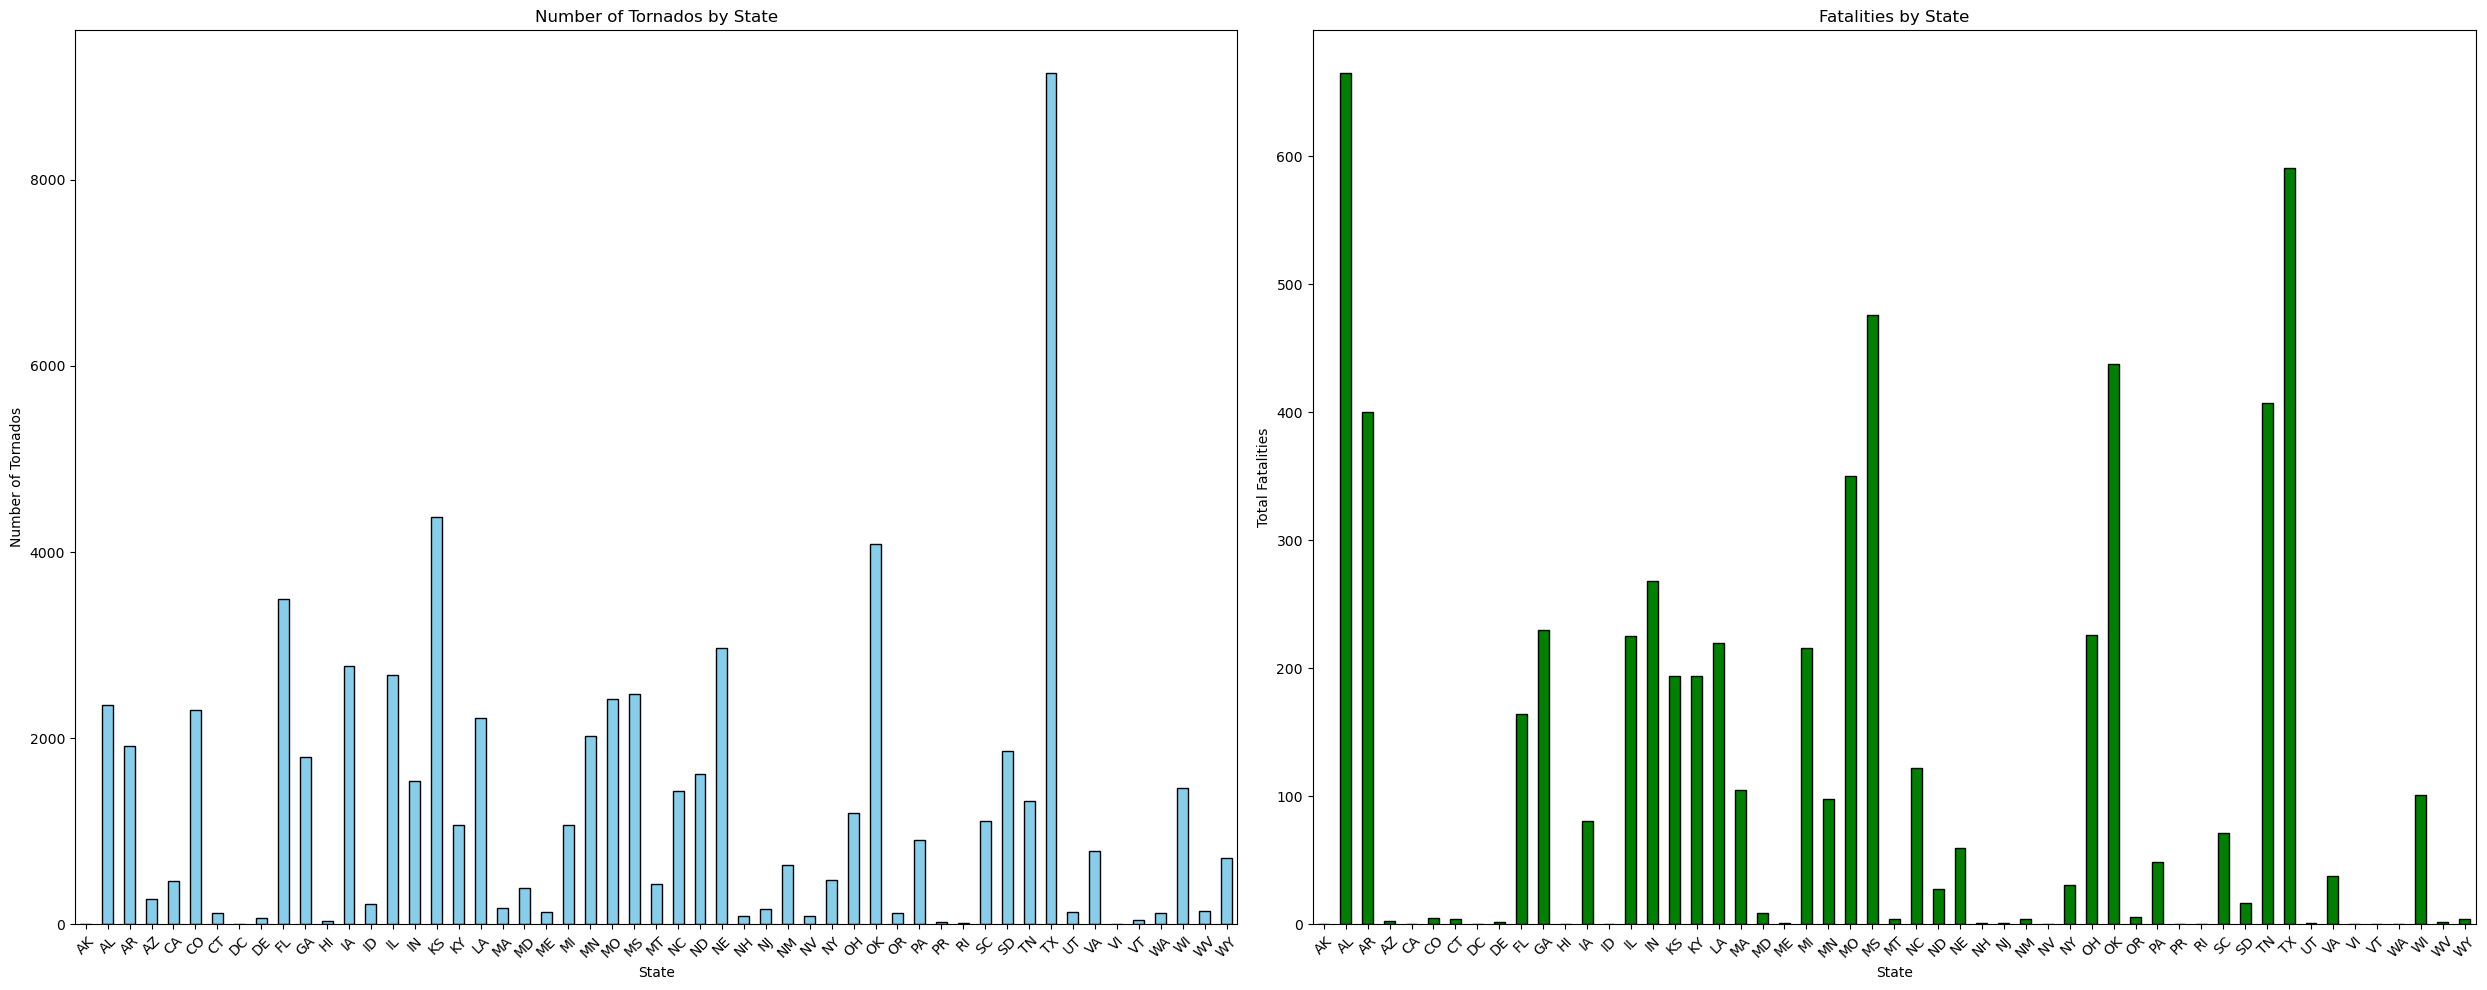

In [5]:
# Count the number of tornados per state
tornado_counts = df["st"].value_counts().sort_index()

# Sum the fatalities per state
fatalities_by_state = df.groupby("st")["fat"].sum()

plt.figure(figsize=(25, 10))

# Plot the number of tornados per state
# First plot
plt.subplot(1, 2, 1)
tornado_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Number of Tornados by State")
plt.xlabel("State")
plt.ylabel("Number of Tornados")
plt.xticks(rotation=45)

# Plot fatalities per state
# Second plot
plt.subplot(1, 2, 2)
fatalities_by_state.plot(kind="bar", color="green", edgecolor="black")
plt.title("Fatalities by State")
plt.xlabel("State")
plt.ylabel("Total Fatalities")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# *************************************************************************************************************************************************
# Use of ChatGPT to figure out how to make two plots in one output cell
# Prompt: "How do I make it so instead of having two plots in two different cells I can combine them into one cell and display them both together"
# *************************************************************************************************************************************************

##### <em><strong>Analyses of graphs:</em></strong>

<strong>States with the Highest Number of Tornadoes:</strong>

1. Texas (`TX`) stands out as the state with the highest number of tornados by a significant margin, exceeding 8,000 occurrences. This suggests that Texas is a major hotspot for tornado activity.
2. Kansas (`KS`), Oklahoma (`OK`), and Florida (`FL`) also show high tornado counts, each with more than 3,000 occurrences, indicating they are states with a significant frequency of tornados.
3. Other states with notable tornado numbers include Missouri (`MO`), Illinois (`IL`), and Iowa (`IA`), with counts ranging from around 2,000 to 4,000.

<strong>States with the Highest Fatality Rates:</strong>

1. Alabama (`AL`) and Mississippi (`MS`) have the highest tornado-related fatalities despite not having the highest tornado counts, indicating that tornados in these states might be particularly severe or impact densely populated areas.
2. Texas (`TX`) also has a high fatality count, correlating with its high number of tornado occurrences, suggesting that while Texas experiences many tornados, a portion of them are severe enough to cause significant fatalities.
3. Missouri (`MO`) and Arkansas (`AR`) exhibit elevated fatality counts, hinting that tornados in these regions may also have considerable impacts.

<strong>Comparison Between Tornado Numbers and Fatalities:</strong>

- Texas (`TX`) has the most tornados but doesn’t have the highest fatality rate. This could imply that while many tornados occur, a good portion might be weaker, or the state may have effective warning systems and preparedness measures in place.
- Alabama (`AL`) and Mississippi (`MS`) have relatively fewer tornados compared to states like Texas, but the fatalities are high, suggesting a higher average severity of tornados or more vulnerable populations.
- Oklahoma (`OK`), which has a substantial number of tornados, does not have correspondingly high fatality numbers, suggesting that mitigation efforts may be effective there.
- Some states with moderate tornado counts, such as Illinois (`IL`) and Iowa (`IA`), do not exhibit proportionally high fatalities, which might be indicative of tornado intensity, population distribution, or preparedness.

<strong>Conclusion gathered from the visual data:</strong> 

States like Texas lead in tornado frequency, but states such as Alabama and Mississippi have disproportionately higher fatalities relative to their tornado numbers, indicating that fatalities are not solely dependent on the number of tornados but also on their intensity, timing, and regional preparedness. The visual use of two graphs successfully highlights these discrepancies, allowing for clear comparisons between regions regarding tornado impacts and fatality outcomes.

##### <em> Average amount of fatalities (mean fatalities) per state per 5 year interval </em>

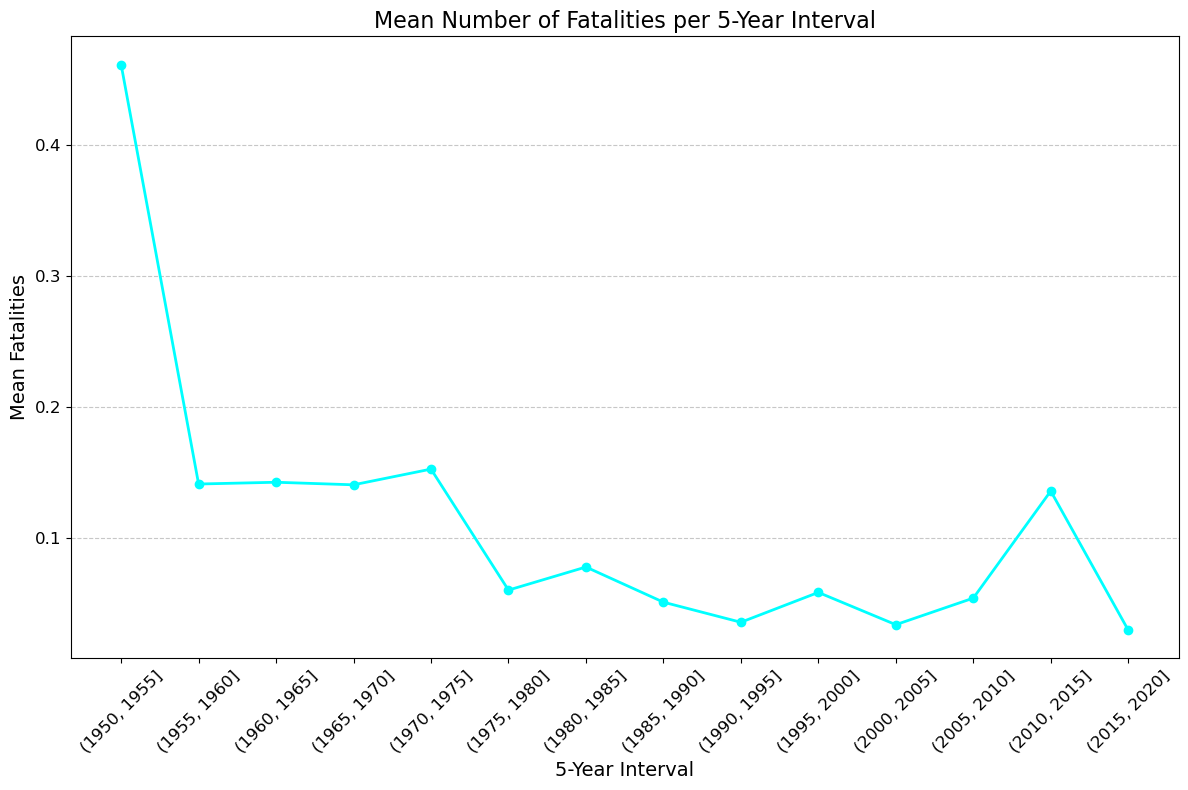

In [6]:
# Create a new column for 5-year intervals based on the year
df["year_bin"] = pd.cut(df["yr"], bins=range(df["yr"].min(), df["yr"].max(), 5))

# Group by 5-year intervals and calculate the mean number of fatalities
mean_fatalities_per_interval = df.groupby("year_bin")["fat"].mean().reset_index()

# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(mean_fatalities_per_interval["year_bin"].astype(str), mean_fatalities_per_interval["fat"], marker="o", linestyle="-", color="cyan", linewidth=2)

# Titles and labels
plt.title("Mean Number of Fatalities per 5-Year Interval", fontsize=16)
plt.xlabel("5-Year Interval", fontsize=14)
plt.ylabel("Mean Fatalities", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Display the graph
plt.tight_layout()
plt.show()

The "Mean Number of Fatalities per 5-Year Interval" plot shows that the years between 1950-1955 had the most amount of average fatalities caused by tornados by a considerable margin compared to any other 5 year interval. A pretty consistent run of fatalities happend between the years of 1955-1975 which then tapered off to a lower amount afterward. Another large spike in fatalities happened in 2010-2015 which was comparable to the consistency that showed up in the prior 1955-1975 year span. Its interresting to note that the amount of fatalities had spiked when the enhanced fujita scale was more integrated into the United States.

##### <em> Fatalities caused by each magnitude of tornado </em>

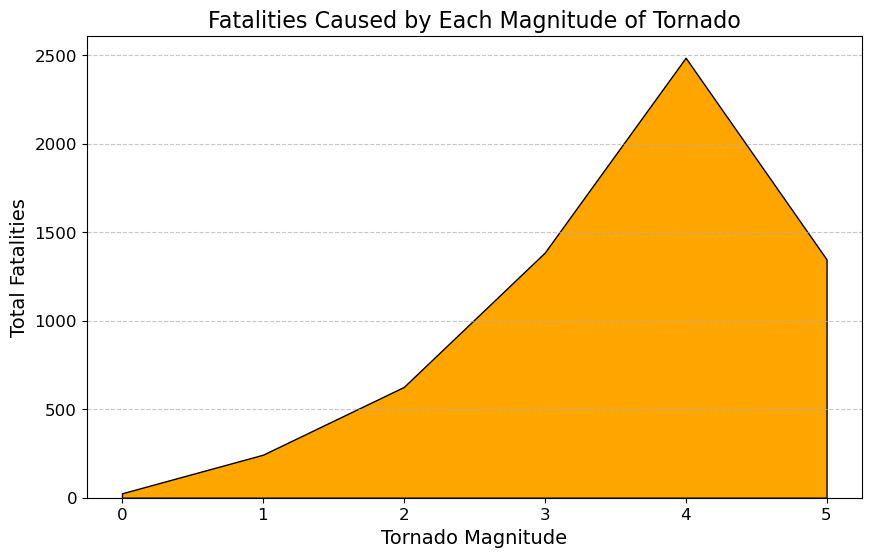

<Figure size 640x480 with 0 Axes>

In [7]:
# Filter out -9 as a measured magnitude
filtered_df = df[df["mag"] != -9]

# Group the data by tornado magnitude and sum the fatalities for each magnitude
fatalities_by_magnitude = filtered_df.groupby("mag")["fat"].sum().reset_index()

# Preparing data for stackplot
magnitudes = fatalities_by_magnitude["mag"]
fatalities = fatalities_by_magnitude["fat"]

# Plotting the fatalities by tornado magnitude using a stackplot
plt.figure(figsize=(10, 6))
plt.stackplot(magnitudes, fatalities, colors=["orange"], alpha=1, edgecolor="black")

# Adding titles and labels
plt.title("Fatalities Caused by Each Magnitude of Tornado", fontsize=16)
plt.xlabel("Tornado Magnitude", fontsize=14)
plt.ylabel("Total Fatalities", fontsize=14)

# Customize ticks for better readability
plt.xticks(magnitudes, fontsize=12)
plt.yticks(fontsize=12)

# Grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Display the graph
plt.tight_layout()


 the "Fatalities Caused by Each magnitude of Tornado" plot clearly shows a left skewe, the data tapers off the the left meaning the bulk of fatalities occur as the tornados increase in magnitude tapering back off. An obvious observation is that magnitude 4 tornados have the highest total fatality rate but does this mean that they are the most deadly? I'll take a closer look at this later. An interesting observation is that although magnitude 5 tornados make up an extremely small margin of the total amount of tornados they still have a comparable amount of fatalities to magnitude 3 tornados which out number magnitude 5's.

In [8]:
# Sum of all magnitude 5 tornados
mag_5 = df["mag"] == 5
print("Sum of magnitude 5's:" ,mag_5.sum())

# Sum of all magnitude 3 tornados
mag_3 = df["mag"] == 3
print("Sum of magnitude 3's:" ,mag_3.sum())

# Ratio of 3's to 5's
print("Ratio of 3's to 5's:", (mag_3.sum()/mag_5.sum()).round(1),":1")

Sum of magnitude 5's: 59
Sum of magnitude 3's: 2536
Ratio of 3's to 5's: 43.0 :1


##### <em>__________________________________________________________________________________________________________________________________________________ </em>

### This leads to another interesting question:

##### <em> What is the ratio of total fatalities per each magnitude of tornado (totaled)?</em>

In [9]:
# Sum of all magnitude 0 tornados
mag_0 = df["mag"] == 0
print("Sum of magnitude 0's:", mag_0.sum())
# Sum of all magnitude 0 tornado fatalities
mag_0_fat = df.loc[mag_0, "fat"]
print("Sum of magnitude 0's fatalities:", mag_0_fat.sum())
# ratio of all magnitude 0 tornado fatalities compared to all magnitude 0 tornados
mag_0_ratio = mag_0_fat.sum()/mag_0.sum()
print("Ratio of deaths to amount of tornados(magnitude: 0)",mag_0_ratio)
print("")

# Sum of all magnitude 1 tornados
mag_1 = df["mag"] == 1
print("Sum of magnitude 1's:", mag_1.sum())
# Sum of all magnitude 1 tornado fatalities
mag_1_fat = df.loc[mag_1, "fat"]
print("Sum of magnitude 1's fatalities:", mag_1_fat.sum())
# ratio of all magnitude 1 tornado fatalities compared to all magnitude 1 tornados
mag_1_ratio = mag_1_fat.sum()/mag_1.sum()
print("Ratio of deaths to amount of tornados(magnitude: 1)",mag_1_ratio)
print("")

# Sum of all magnitude 2 tornados
mag_2 = df["mag"] == 2
print("Sum of magnitude 2's:", mag_2.sum())
# Sum of all magnitude 2 tornado fatalities
mag_2_fat = df.loc[mag_2, "fat"]
print("Sum of magnitude 2's fatalities:", mag_2_fat.sum())
# ratio of all magnitude 2 tornado fatalities compared to all magnitude 2 tornados
mag_2_ratio = mag_2_fat.sum()/mag_2.sum()
print("Ratio of deaths to amount of tornados(magnitude: 2)",mag_2_ratio)
print("")

# Sum of all magnitude 3 tornados
mag_3 = df["mag"] == 3
print("Sum of magnitude 3's:", mag_3.sum())
# Sum of all magnitude 3 tornado fatalities
mag_3_fat = df.loc[mag_3, "fat"]
print("Sum of magnitude 3's fatalities:", mag_3_fat.sum())
# ratio of all magnitude 3 tornado fatalities compared to all magnitude 3 tornados
mag_3_ratio = mag_3_fat.sum()/mag_3.sum()
print("Ratio of deaths to amount of tornados(magnitude: 3)",mag_3_ratio)
print("")

# Sum of all magnitude 4 tornados
mag_4 = df["mag"] == 4
print("Sum of magnitude 4's:", mag_4.sum())
# Sum of all magnitude 4 tornado fatalities
mag_4_fat = df.loc[mag_4, "fat"]
print("Sum of magnitude 4's fatalities:", mag_4_fat.sum())
# ratio of all magnitude 4 tornado fatalities compared to all magnitude 4 tornados
mag_4_ratio = mag_4_fat.sum()/mag_4.sum()
print("Ratio of deaths to amount of tornados(magnitude: 4)",mag_4_ratio)
print("")

# Sum of all magnitude 5 tornados
mag_5 = df["mag"] == 5
print("Sum of magnitude 5's:", mag_5.sum())
# Sum of all magnitude 5 tornado fatalities
mag_5_fat = df.loc[mag_5, "fat"]
print("Sum of magnitude 5's fatalities:", mag_5_fat.sum())
# ratio of all magnitude 5 tornado fatalities compared to all magnitude 5 tornados
mag_5_ratio = mag_5_fat.sum()/mag_5.sum()
print("Ratio of deaths to amount of tornados(magnitude: 5)", mag_5_ratio)

Sum of magnitude 0's: 31375
Sum of magnitude 0's fatalities: 25
Ratio of deaths to amount of tornados(magnitude: 0) 0.0007968127490039841

Sum of magnitude 1's: 22885
Sum of magnitude 1's fatalities: 243
Ratio of deaths to amount of tornados(magnitude: 1) 0.01061830893598427

Sum of magnitude 2's: 9517
Sum of magnitude 2's fatalities: 626
Ratio of deaths to amount of tornados(magnitude: 2) 0.06577703057686246

Sum of magnitude 3's: 2536
Sum of magnitude 3's fatalities: 1385
Ratio of deaths to amount of tornados(magnitude: 3) 0.5461356466876972

Sum of magnitude 4's: 581
Sum of magnitude 4's fatalities: 2486
Ratio of deaths to amount of tornados(magnitude: 4) 4.278829604130809

Sum of magnitude 5's: 59
Sum of magnitude 5's fatalities: 1347
Ratio of deaths to amount of tornados(magnitude: 5) 22.83050847457627


##### <em> Properly formatted </em>

In [10]:
# Data Preparation
data = {
    "Magnitude": [0, 1, 2, 3, 4, 5],
    "Total Tornadoes": [mag_0.sum(), mag_1.sum(), mag_2.sum(), mag_3.sum(), mag_4.sum(), mag_5.sum()],
    "Total Fatalities": [mag_0_fat.sum(), mag_1_fat.sum(), mag_2_fat.sum(), mag_3_fat.sum(), mag_4_fat.sum(), mag_5_fat.sum()],
    "Fatalities per Tornado": [mag_0_ratio, mag_1_ratio, mag_2_ratio, mag_3_ratio, mag_4_ratio, mag_5_ratio]
}

# Creating DataFrame
tornado_table = pd.DataFrame(data)

# Displaying the table
print(tornado_table)

   Magnitude  Total Tornadoes  Total Fatalities  Fatalities per Tornado
0          0            31375                25                0.000797
1          1            22885               243                0.010618
2          2             9517               626                0.065777
3          3             2536              1385                0.546136
4          4              581              2486                4.278830
5          5               59              1347               22.830508


This is the raw data. In the plot 'Fatalities Caused by Each Magnitude of Tornado' there were some notable observations, one being that magnitude 4 tornados had the greatest total amount of fatalities. The fact that magnitude 4's had the greatest amount did not correlate to them being the most deadly since the ratio of total fatalities to total amount in the case of magnitude 4's was around 4 deaths per magnitude 4 tornado on average. Another observation was that magnitude 3's and 5's had around the same amount of fatalities. Judging by the numbers above it is clear to see that the only reason magnitude 3 tornados had a comparable amount of fatalities was only because they out number magnitude 5's as stated before by a factor of 43:1. Magnitude 5 tornados were by far the deadliest with a ratio of magnitude to fatality coming out to a stagering 22 almost 23 average deaths per magnitude 5 tornado!!!

##### <em>Visualizing the Data</em>

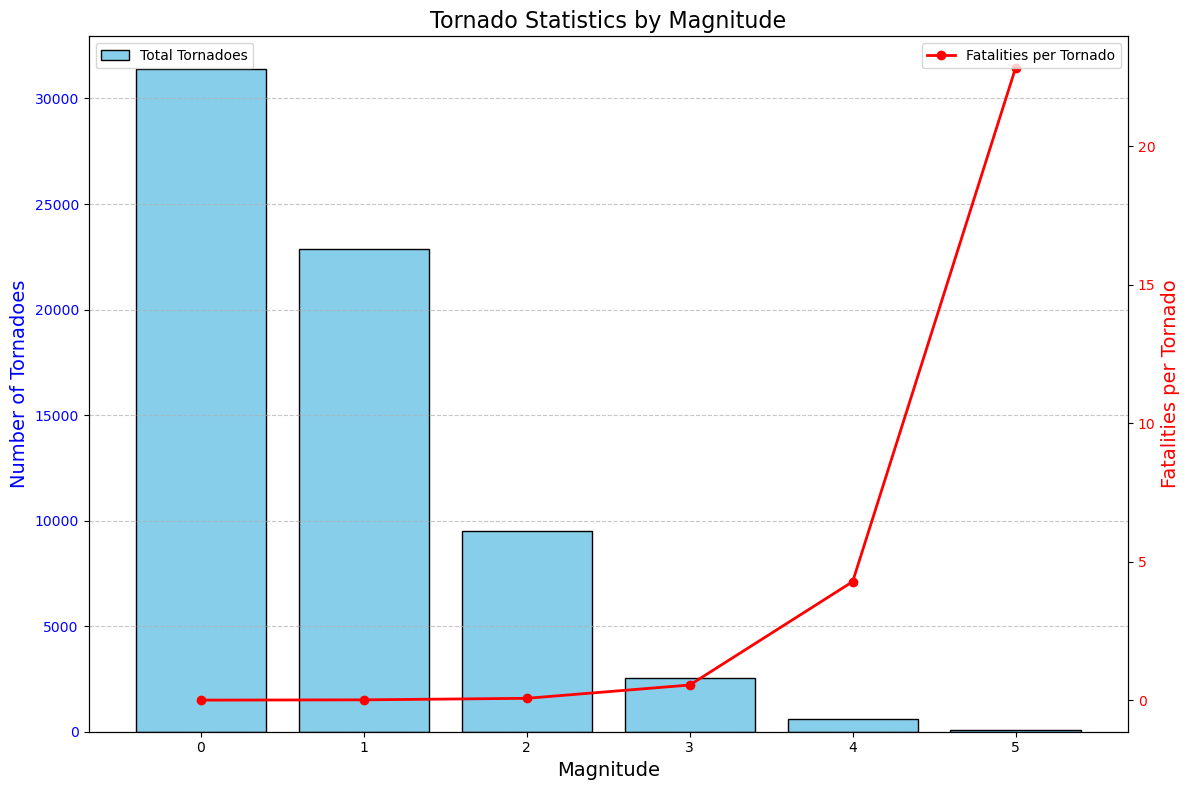

In [11]:
# Calculate the total number of tornadoes and fatalities for each magnitude
magnitudes = range(6)
total_tornadoes = []
total_fatalities = []
fatalities_ratio = []

for mag in magnitudes:
    mag_filter = df["mag"] == mag
    total_tornadoes.append(mag_filter.sum())
    total_fatalities.append(df.loc[mag_filter, "fat"].sum())

# Calculate the ratio of fatalities per tornado by magnitude
for i in range(len(magnitudes)):
    if total_tornadoes[i] > 0:
        fatalities_ratio.append(total_fatalities[i] / total_tornadoes[i])
    else:
        fatalities_ratio.append(0)

# Create a DataFrame to visualize data easily
data = pd.DataFrame({
    "Magnitude": magnitudes,
    "Total Tornadoes": total_tornadoes,
    "Total Fatalities": total_fatalities,
    "Fatalities per Tornado": fatalities_ratio
})

# Plotting the data
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar chart for total tornadoes by magnitude
ax1.bar(data["Magnitude"], data["Total Tornadoes"], color="skyblue", edgecolor="black", label="Total Tornadoes")
ax1.set_xlabel("Magnitude", fontsize=14)
ax1.set_ylabel("Number of Tornadoes", fontsize=14, color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_title("Tornado Statistics by Magnitude", fontsize=16)

# Creating a second y-axis to plot fatalities ratio
ax2 = ax1.twinx()
ax2.plot(data["Magnitude"], data["Fatalities per Tornado"], color="red", marker="o", linestyle="-", linewidth=2, label="Fatalities per Tornado")
ax2.set_ylabel("Fatalities per Tornado", fontsize=14, color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Add legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Display the grid for better readability
ax1.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


###### - generated extension by ChatGPT, Prompt: 

"extend this: "the plot "Tornado Statistics by Magnitude" shows something extremely interesting. As number of tornados by magnitude decreases exponentially the deadlier they get at an almost equally exponential rate!""

###### v Edited to fit graph by including specific observations by me

The plot, "Tornado Statistics by Magnitude," reveals a fascinating and somewhat counterintuitive pattern in the data. As the number of tornadoes decreases with increasing magnitude—following an exponential decline—the deadliness of these rarer, higher-magnitude tornadoes increases at an almost equivalent exponential rate. This pattern suggests that while weaker tornadoes (magnitudes 0 to 2) are far more frequent, they result in fewer fatalities per occurrence. Conversely, the most severe tornadoes (magnitudes 3 and above), though much rarer, are significantly deadlier, leading to a disproportionately higher number of fatalities per event.

This trend highlights the immense destructive power of higher-magnitude tornadoes, even when they make up a smaller percentage of total tornado occurrences. The data suggests that the energy and intensity associated with higher-magnitude tornadoes contribute to their lethality, emphasizing the importance of advanced warning systems, emergency preparedness, and robust infrastructure in regions prone to these catastrophic events.

In summary, while the sheer number of lower-magnitude tornadoes dominates the statistics, the real threat lies in the deadly efficiency of high-magnitude tornadoes. This insight is crucial for policymakers, meteorologists, and emergency planners who aim to reduce casualties and damage, highlighting the necessity of robust response strategies that scale appropriately with tornado severity.

##### <em>__________________________________________________________________________________________________________________________________________________ </em>

### Discussion

The dataset and visual analyses highlight the complex nature of tornado occurrences and their impacts. The most frequent tornadoes are not necessarily the deadliest, and regions with fewer events may face higher risks due to more intense tornadoes when they do occur. The increasing fatality rates with magnitude demonstrate that high-magnitude tornadoes, despite their rarity, present the greatest threat to life and require focused efforts in preparedness and mitigation. Moving forward, combining this historical data with modern forecasting technology could offer even deeper insights, allowing communities to become more resilient in the face of severe weather threats.

###### - generated conclusion by ChatGPT, Prompt:

"Provide me with a final conclusion based upon the first prompt I gave assuming the assignment has been finished"

##### <em>__________________________________________________________________________________________________________________________________________________ </em>

### References

1. https://commons.wikimedia.org/wiki/Category:2013_El_Reno_tornado#/media/File:El_Reno,_OK_EF3_Tornado_2013-05-31.jpg
2. https://matplotlib.org/stable/users/explain/colors/colormaps.html
3. https://en.wikipedia.org/wiki/Enhanced_Fujita_scale
4. https://www.w3schools.com/python/matplotlib_subplot.asp
5. https://www.markdownguide.org/basic-syntax/
6. https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html
7. https://www.kaggle.com/datasets/danbraswell/us-tornado-dataset-1950-2021
8. https://www.spc.noaa.gov/wcm/#data
9. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
10. https://www.statology.org/matplotlib-two-y-axes/#:~:text=We%20can%20use%20the%20following%20code%20to%20create,col2%20%3D%20%27red%27%20%23define%20subplots%20fig%2Cax%20%3D%20plt.subplots%28%29
11. https://www.geeksforgeeks.org/plot-multiple-plots-in-matplotlib/
12. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
13. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html
14. https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
15. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html
16. https://www.youtube.com/watch?v=PTy7hw7goeA&ab_channel=CodeComponent
17. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html
18. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html#

##### <em>__________________________________________________________________________________________________________________________________________________ </em>

### LLM Prompts

1."Provide the reader with some background on your question and data. Where
did you get your data? What question looked interesting given the data you chose? This
section should be between 150-500 words. 

Given this info: “This dataset was derived from a dataset produced by NOAA's Storm Prediction Center. The primary changes made to create this dataset were the deletion of some columns, change of some data types, and sorting by date. Questions: 1. Are there any observable trends in the severity of tornados (measured by mag) over the years? (Magnitude v. Date), 2. Which states (st) experience the highest number of tornados, and how does this distribution compare to injury and fatality rates? (Tornado # v. State, Injury/Fatality rates v. State)"

2."How do I make it so instead of having two plots in two different cells I can combine them into one cell and display them both together"

3."extend this: "the plot "Tornado Statistics by Magnitude" shows something extremely interesting. As number of tornados by magnitude decreases exponentially the deadlier they get at an almost equally exponential rate!""

4."Provide me with a final conclusion based upon the first prompt I gave assuming the assignment has been finished"